## File : Exercise 6-1_Edris_Safari.ipynb
## Name:Edris Safari
## Date:1/10/2019
## Course: DSC530 - Data Exploration and Analysis
## Desc: Week5 exercise 6-1 assignment


### Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?


In [1]:
# Copied from  hinc2.py
from __future__ import print_function

import numpy as np

import hinc
import thinkplot
import thinkstats2


def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [23]:
# Copied from chp06ex.jpynb
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def Var(xs):
    return CentralMoment(xs, 2)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [24]:
df = hinc.ReadData()
df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


c:\users\safar\documents\github\thinkstats2\venv\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\safar\documents\github\thinkstats2\venv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


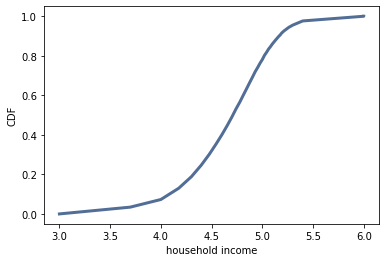

<Figure size 576x432 with 0 Axes>

In [25]:
log_sample = InterpolateSample(df, log_upper=6.0)

log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

In [26]:
len(log_sample)
log_sample[len(log_sample)-1]

6.0

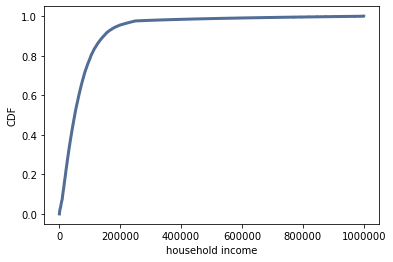

<Figure size 576x432 with 0 Axes>

In [27]:
# Compute sample 
sample = np.power(10,log_sample)

sample_cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(sample_cdf)
thinkplot.Show(xlabel='household income',
                   ylabel='CDF')


In [28]:
print('Mean of sample:',Mean(sample))


Median of sample: 74278.70753118733


In [29]:
print('Median of sample:',Median(sample))

Median of sample: 51226.45447894046


In [ ]:
print('Skewness of sample:',Skewness(sample))

In [ ]:
print('PearsonMedianSkewness of sample:',PearsonMedianSkewness(sample))

In [36]:
print('Percentage of housholds with less than mean:',int(sample_cdf.Prob(Mean(sample))*100),'%')


Percentage of housholds with less than mean: 66 %
